In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing 

from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
ttrain = pd.read_csv(r'C:\Users\BHAVANA\Downloads\aug_train.csv')

In [3]:
ttrain.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
ttrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
enrollee_id               19158 non-null int64
city                      19158 non-null object
city_development_index    19158 non-null float64
gender                    14650 non-null object
relevent_experience       19158 non-null object
enrolled_university       18772 non-null object
education_level           18698 non-null object
major_discipline          16345 non-null object
experience                19093 non-null object
company_size              13220 non-null object
company_type              13018 non-null object
last_new_job              18735 non-null object
training_hours            19158 non-null int64
target                    19158 non-null float64
dtypes: float64(2), int64(2), object(10)
memory usage: 2.0+ MB


In [5]:
ttrain.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [6]:
ttrain.dropna(axis=0, inplace=True)

In [7]:
# conversion of non numeric features into numeric

# creating label encoder object
label_encoder = preprocessing.LabelEncoder() 
  
#For Training
ttrain['city']=label_encoder.fit_transform(ttrain['city'])
ttrain['gender']=label_encoder.fit_transform(ttrain['gender'])
ttrain['relevent_experience']=label_encoder.fit_transform(ttrain['relevent_experience'])
ttrain['enrolled_university']=label_encoder.fit_transform(ttrain['enrolled_university'])
ttrain['education_level']=label_encoder.fit_transform(ttrain['education_level'])
ttrain['major_discipline']=label_encoder.fit_transform(ttrain['major_discipline'])
ttrain['company_type']=label_encoder.fit_transform(ttrain['company_type'])
ttrain['last_new_job']=label_encoder.fit_transform(ttrain['last_new_job'])
ttrain['experience']=label_encoder.fit_transform(ttrain['experience'])

#For Testing
ttrain['city']=label_encoder.fit_transform(ttrain['city'])
ttrain['gender']=label_encoder.fit_transform(ttrain['gender'])
ttrain['relevent_experience']=label_encoder.fit_transform(ttrain['relevent_experience'])
ttrain['enrolled_university']=label_encoder.fit_transform(ttrain['enrolled_university'])
ttrain['education_level']=label_encoder.fit_transform(ttrain['education_level'])
ttrain['major_discipline']=label_encoder.fit_transform(ttrain['major_discipline'])
ttrain['company_type']=label_encoder.fit_transform(ttrain['company_type'])
ttrain['last_new_job']=label_encoder.fit_transform(ttrain['last_new_job'])
ttrain['experience']=label_encoder.fit_transform(ttrain['experience'])

In [8]:
ttrain.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1,29725,72,0.776,1,1,2,0,5,6,50-99,5,4,47,0.0
4,666,48,0.767,1,0,2,1,5,21,50-99,1,3,8,0.0
7,402,78,0.762,1,0,2,0,5,4,<10,5,4,18,1.0
8,27107,5,0.920,1,0,2,0,5,17,50-99,5,0,46,1.0
11,23853,5,0.920,1,0,2,0,5,15,5000-9999,5,0,108,0.0
12,25619,86,0.913,1,0,2,0,5,21,1000-4999,5,2,23,0.0
15,6588,12,0.926,1,0,2,0,5,7,10/49,5,4,18,0.0
20,31972,45,0.843,1,0,2,1,5,2,100-500,5,0,68,0.0
21,19061,12,0.926,1,0,2,1,5,2,100-500,5,1,50,0.0
23,7041,72,0.776,1,0,2,0,2,20,1000-4999,5,0,65,0.0


In [9]:
#missing values
ttrain.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [10]:
ttrain.drop(['enrollee_id'],axis=1,inplace=True)
ttrain.drop(['company_size'],axis=1,inplace=True)

In [36]:
ttrain.head(100)

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
1,72,0.776,1,1,2,0,5,6,5,4,47,0.0
4,48,0.767,1,0,2,1,5,21,1,3,8,0.0
7,78,0.762,1,0,2,0,5,4,5,4,18,1.0
8,5,0.920,1,0,2,0,5,17,5,0,46,1.0
11,5,0.920,1,0,2,0,5,15,5,0,108,0.0
12,86,0.913,1,0,2,0,5,21,5,2,23,0.0
15,12,0.926,1,0,2,0,5,7,5,4,18,0.0
20,45,0.843,1,0,2,1,5,2,5,0,68,0.0
21,12,0.926,1,0,2,1,5,2,5,1,50,0.0
23,72,0.776,1,0,2,0,2,20,5,0,65,0.0


In [12]:
ttrain.shape

(8955, 12)

0.0    7472
1.0    1483
Name: target, dtype: int64


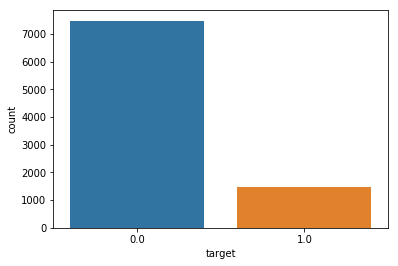

In [66]:
sa=sns.countplot(x="target",data=ttrain)
print(ttrain["target"].value_counts())

In [71]:
feature = ttrain.drop(['target'], inplace=False, axis=1)
labels = ttrain['target'].copy()
feature.shape

(8955, 11)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(feature,labels,test_size = 0.2, random_state = 1)

In [75]:
x = pd.concat([X_train, y_train], axis=1)

In [76]:
x.shape

(7164, 12)

In [77]:
x['target'].value_counts()

0.0    5990
1.0    1174
Name: target, dtype: int64

In [78]:
Labels = x['target'].copy()

In [79]:
leave = Labels[labels == 0]
stay = Labels[labels == 1]

In [80]:
print(leave.shape)
print(stay.shape)

(5990,)
(1174,)


In [82]:
from sklearn.utils import resample
feature_leave = x[x.target == 1]
feature_stay = x[x.target == 0]

ttrain_leave_upsampled = resample(feature_leave, replace=True,n_samples=5990,random_state=123)
ttrain_leave_upsampled.shape

(5990, 12)

In [84]:
upsampledData=pd.concat([feature_stay,ttrain_leave_upsampled])
upsampledData.shape

(11980, 12)

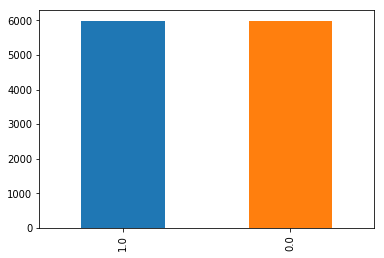

In [85]:
upsampledData['target'].value_counts().plot.bar()

In [93]:
upsampledData.head(10)

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
13659,5,0.920,0,0,2,1,5,21,5,4,63,0.0
17406,12,0.926,1,0,2,1,5,2,5,4,136,0.0
7445,36,0.840,1,0,2,0,1,4,4,1,48,0.0
4916,5,0.920,1,0,2,0,5,16,5,0,22,0.0
11226,105,0.923,1,0,2,0,5,4,5,1,35,0.0
8484,5,0.920,0,0,2,0,5,18,5,3,84,0.0
6276,6,0.924,1,0,2,0,5,19,5,0,7,0.0
8114,5,0.920,1,0,2,0,5,10,5,1,55,0.0
5199,5,0.920,1,0,2,1,5,21,5,3,35,0.0
15487,5,0.920,1,0,2,1,5,4,5,1,22,0.0


In [94]:
X = upsampledData.drop(['target'], axis = 1, inplace = False)
y = upsampledData['target']

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 10)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8985, 11) (2995, 11) (8985,) (2995,)


In [96]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import r2_score,confusion_matrix,accuracy_score,classification_report

In [102]:
#Logistic Regression

LF = LogisticRegression().fit(X_train, y_train)

C:\Users\BHAVANA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [103]:
y_pred = LF.predict(X_test)
print(y_pred)

[1. 0. 1. ... 1. 1. 0.]


In [105]:
print(r2_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

-0.187341969720618
0.7031719532554257
              precision    recall  f1-score   support

         0.0       0.67      0.81      0.73      1505
         1.0       0.76      0.59      0.67      1490

   micro avg       0.70      0.70      0.70      2995
   macro avg       0.71      0.70      0.70      2995
weighted avg       0.71      0.70      0.70      2995



In [111]:
#KNN

knnClass = KNeighborsClassifier(n_neighbors=25).fit(X_train,y_train)
ypred = knnClass.predict(X_test)
ypred

array([1., 1., 1., ..., 1., 1., 0.])

In [115]:
print(accuracy_score(y_test,ypred))
print(classification_report(y_test,ypred))

0.6968280467445743
              precision    recall  f1-score   support

         0.0       0.69      0.73      0.71      1505
         1.0       0.71      0.66      0.69      1490

   micro avg       0.70      0.70      0.70      2995
   macro avg       0.70      0.70      0.70      2995
weighted avg       0.70      0.70      0.70      2995



In [118]:
#Random Forest

RF = RandomForestClassifier(bootstrap=False, 
                                max_depth=20, 
                                n_estimators=700,
                                random_state=13).fit(X_train, y_train)
ypre = RF.predict(X_test)
ypre

array([1., 0., 1., ..., 1., 0., 1.])

In [119]:
print(accuracy_score(y_test,ypre))
print(classification_report(y_test,ypre))

0.9412353923205342
              precision    recall  f1-score   support

         0.0       0.96      0.93      0.94      1505
         1.0       0.93      0.96      0.94      1490

   micro avg       0.94      0.94      0.94      2995
   macro avg       0.94      0.94      0.94      2995
weighted avg       0.94      0.94      0.94      2995



In [124]:
#Support Vector Machine

svm = SVC(gamma=0.0870736086175949).fit(X_train,y_train)
ypre = svm.predict(X_test)
ypre

array([1., 0., 1., ..., 1., 0., 1.])

In [125]:
print(accuracy_score(y_test,ypre))
print(classification_report(y_test,ypre))

0.9125208681135225
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.91      1505
         1.0       0.89      0.94      0.91      1490

   micro avg       0.91      0.91      0.91      2995
   macro avg       0.91      0.91      0.91      2995
weighted avg       0.91      0.91      0.91      2995



In [126]:
#Decission Tree

dt =DecisionTreeClassifier(criterion="gini",random_state=100,max_depth=5,min_samples_leaf=5).fit(X_train,y_train)
ypre = dt.predict(X_test)
ypre

array([1., 0., 1., ..., 1., 0., 0.])

In [127]:
print(accuracy_score(y_test,ypre))
print(classification_report(y_test,ypre))

0.727212020033389
              precision    recall  f1-score   support

         0.0       0.67      0.89      0.77      1505
         1.0       0.84      0.56      0.67      1490

   micro avg       0.73      0.73      0.73      2995
   macro avg       0.75      0.73      0.72      2995
weighted avg       0.75      0.73      0.72      2995



In [137]:
#XG Boost
import xgboost as xgb
xgb = xgb.XGBClassifier(max_depth=5,subsample=1,n_estimators=100,learning_rate=.01,min_child_weight=1,random_state=0).fit(X_train,y_train)
ypre = dt.predict(X_test)
ypre

array([1., 0., 1., ..., 1., 0., 0.])

In [138]:
print(accuracy_score(y_test,ypre))
print(classification_report(y_test,ypre))

0.727212020033389
              precision    recall  f1-score   support

         0.0       0.67      0.89      0.77      1505
         1.0       0.84      0.56      0.67      1490

   micro avg       0.73      0.73      0.73      2995
   macro avg       0.75      0.73      0.72      2995
weighted avg       0.75      0.73      0.72      2995

